In [1]:
%load_ext line_profiler
# Init
import os
import sys
module_path = os.path.abspath(os.path.join('../src/simulicronalpha/'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports
import inspect
import random
import tempfile
import uuid
from functools import wraps
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import coloredlogs
import logging
import numpy as np
import pandas as pd
from coolname import generate_slug
import warnings
import cProfile
from numpy import concatenate as c

warnings.filterwarnings("ignore")
logging.getLogger('matplotlib.font_manager').disabled = True

# Logger
logger = logging.getLogger(__name__)
coloredlogs.install(level="DEBUG")

In [2]:
from popSim import generateTransposon, generatePopulation, calculateFitness, generateGenome, generateFitness, recombination, transposition, runSim, runBatch

In [3]:
result = runBatch()

In [4]:
columns = ['State', 'Iterations', 'Transpositions']
df = pd.DataFrame([x for x in result], columns=columns)

In [5]:
df['Transpositions'].value_counts()

2.0       66412
3.0       10567
4.0        3989
5.0        2151
6.0        1404
          ...  
1302.0        1
1133.0        1
1021.0        1
852.0         1
782.0         1
Name: Transpositions, Length: 934, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce7db3510>]],
      dtype=object)

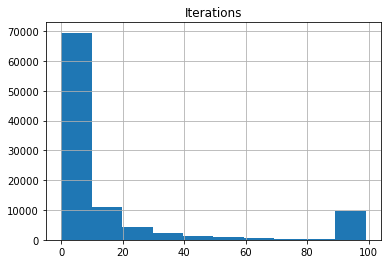

In [15]:
df.hist(column='Iterations')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce7bd2890>]],
      dtype=object)

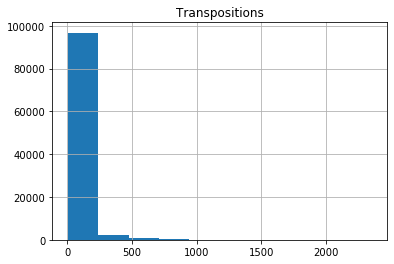

In [14]:
df.hist(column='Transpositions')

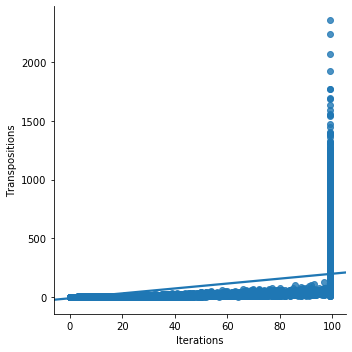

In [13]:
g = sns.lmplot(x="Iterations", y="Transpositions", data=df)

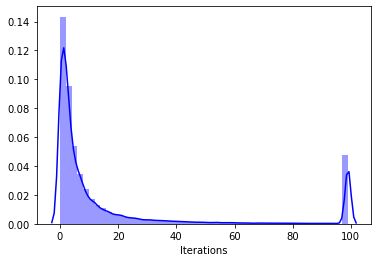

In [18]:
sns.distplot(df['Iterations'], kde=True, color="b")

In [9]:
import seaborn as sns

In [7]:
gen = generateGenome(numberOfInsertionSites=1000)
pop = generatePopulation()
tr  = generateTransposon(gen)

In [ ]:
%%timeit
runSim(gen,pop,tr)

In [ ]:
NumberOfSites = 1000
v1 = np.full(NumberOfSites, "M")
v2 = np.full(NumberOfSites, "F")
rates = np.random.uniform(size=(NumberOfSites - 1))

In [ ]:
%%timeit
recombination(gen[0:, 2], tr, v1=np.asarray([1,2]), v2=np.asarray([0]))

In [ ]:
%lprun -T lprof0 -f runSim runSim(gen,pop,tr)

In [ ]:
k = np.asarray([-0.01,-0.02])
n = np.asarray([])

In [ ]:
(np.exp(sum(np.concatenate([k,n]))))

In [ ]:
argArray = []
for i in range(10000):
    gen = generateGenome(numberOfInsertionSites=1000)
    pop = generatePopulation()
    tr  = generateTransposon(gen)
    argArray.append((gen,pop,tr))

In [ ]:
type(argArray[1])

In [11]:
tr.size/4 - 1

2.0